Gaussian Naive Bayes
====================

Let's set some setting for this Jupyter Notebook.

In [2]:
%matplotlib inline   
from warnings import filterwarnings
filterwarnings("ignore")
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'
os.environ['THEANO_FLAGS'] = 'device=cpu'    
    
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(12345)
rc = {'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20, 'font.size': 20, 
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [12, 6]}
sns.set(rc = rc)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Now, let's import the `GaussianNB` (GaussianNaiveBayes) model from the `pymc-learn` package.

In [3]:
import pmlearn
from pmlearn.naive_bayes import GaussianNB
print('Running on pymc-learn v{}'.format(pmlearn.__version__))

Running on pymc-learn v0.0.1.rc0


## Step 1: Prepare the data
Use the popular iris dataset.

In [4]:
# Load the data and split in train and test set
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
X.shape

(150, 4)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Step 2: Instantiate a model

In [6]:
model = GaussianNB()

## Step 3: Perform Inference

In [7]:
model.fit(X_train, y_train, minibatch_size=20, inference_args={'n': 60000})

Average Loss = 201.71: 100%|██████████| 60000/60000 [00:47<00:00, 1272.93it/s]
Finished [100%]: Average Loss = 201.84


GaussianNB()

## Step 4: Diagnose convergence

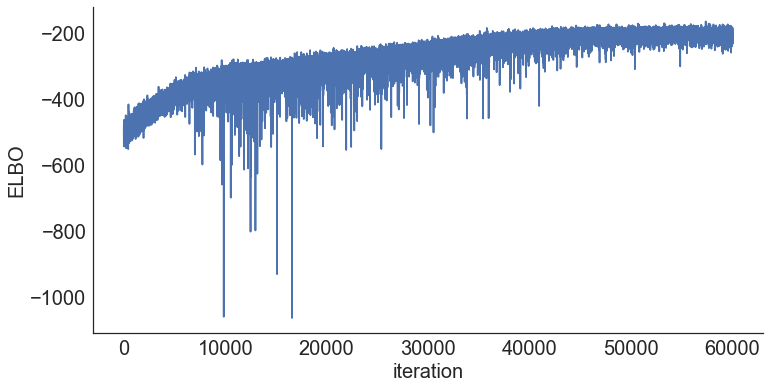

In [8]:
model.plot_elbo()

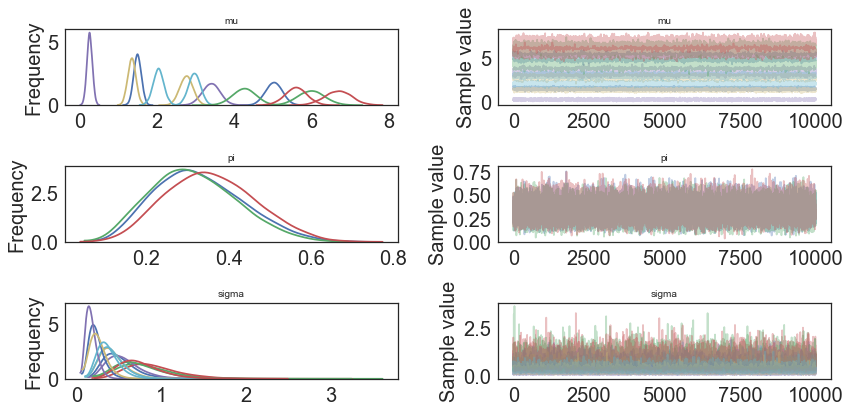

In [9]:
pm.traceplot(model.trace);

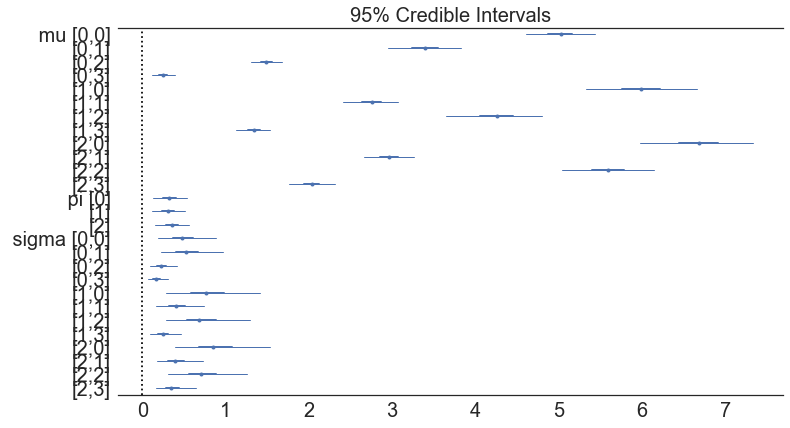

In [10]:
pm.forestplot(model.trace);

## Step 5: Critize the model

In [11]:
pm.summary(model.trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu__0_0,5.019129,0.212662,0.002406,4.605529,5.433732
mu__0_1,3.394539,0.225085,0.002227,2.947272,3.830176
mu__0_2,1.488766,0.096130,0.001063,1.304366,1.681172
mu__0_3,0.250523,0.069351,0.000623,0.119370,0.391107
mu__1_0,5.986291,0.340178,0.003272,5.322534,6.656125
mu__1_1,2.751523,0.166468,0.001648,2.413300,3.069630
mu__1_2,4.253440,0.292789,0.003280,3.647427,4.796967
mu__1_3,1.342020,0.104551,0.000995,1.128888,1.538075
mu__2_0,6.677160,0.343993,0.003418,5.976978,7.327982
mu__2_1,2.962960,0.153138,0.001455,2.666622,3.262982


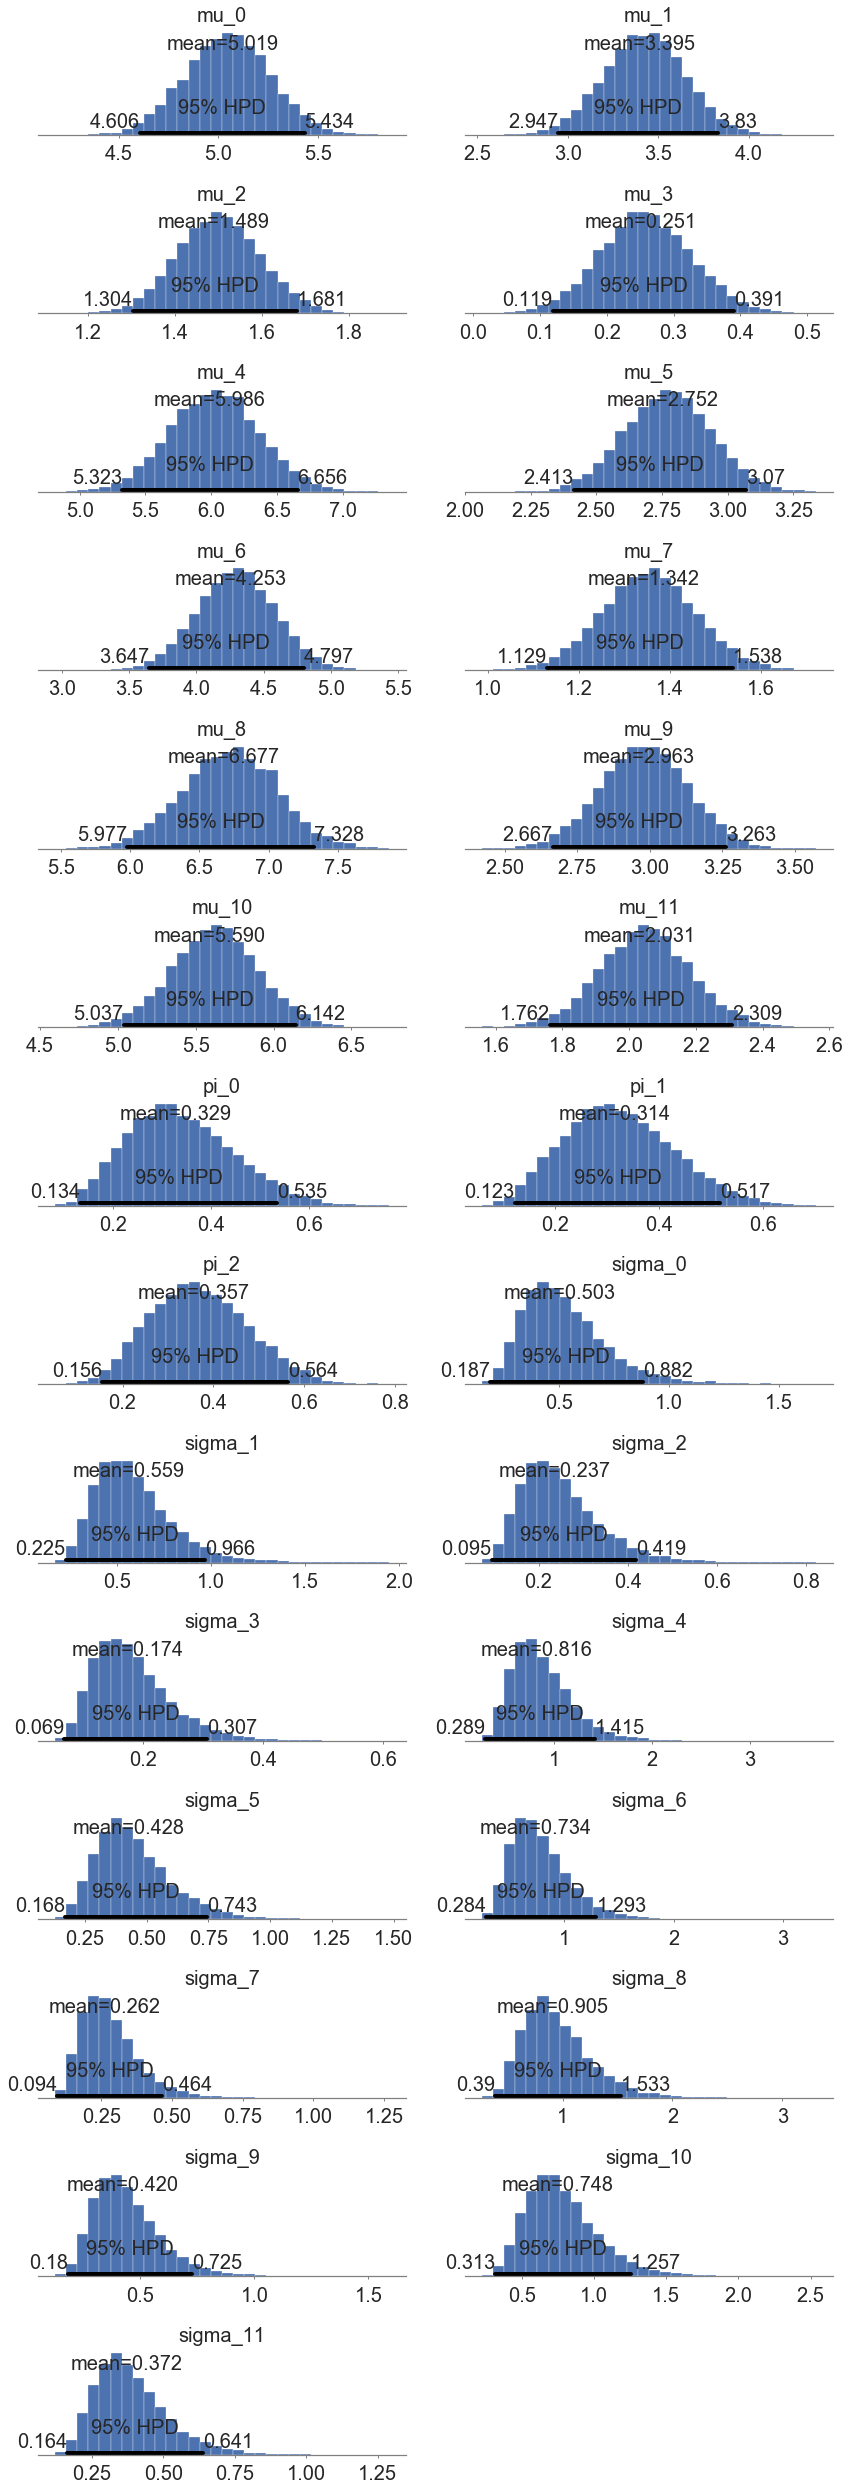

In [12]:
pm.plot_posterior(model.trace);

## Step 6: Use the model for prediction

In [13]:
y_probs = model.predict_proba(X_test)

In [14]:
y_predicted = model.predict(X_test)

In [15]:
model.score(X_test, y_test)

0.9555555555555556

In [16]:
model.save('pickle_jar/gaussian_nb')

#### Use already trained model for prediction

In [17]:
model_new = GaussianNB()

In [18]:
model_new.load('pickle_jar/gaussian_nb')

In [19]:
model_new.score(X_test, y_test)

0.9555555555555556

## MCMC

In [20]:
model2 = GaussianNB()
model2.fit(X_train, y_train, inference_type='nuts')

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_log__, mu, pi_stickbreaking__]
100%|██████████| 2500/2500 [00:08<00:00, 301.33it/s]


GaussianNB()

### Diagnose convergence

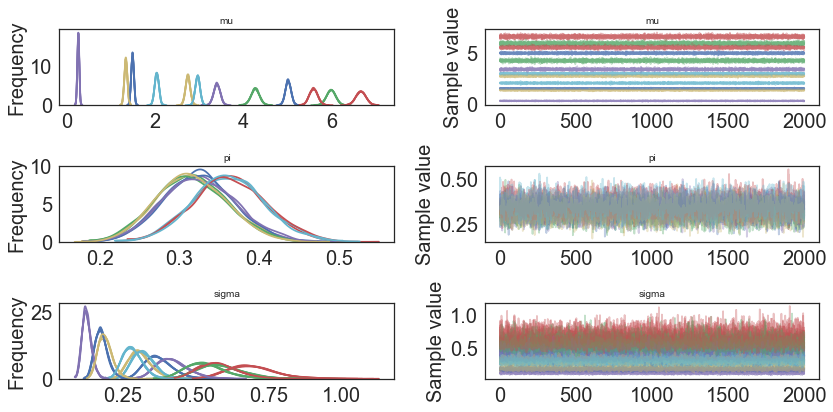

In [21]:
pm.traceplot(model2.trace);

In [22]:
pm.gelman_rubin(model2.trace)

{'mu': array([[ 0.99985081,  0.9999332 ,  0.99978104,  0.99996147],
        [ 0.99982672,  0.99994778,  0.99991087,  0.99986595],
        [ 0.99983744,  0.99977463,  0.99991918,  0.99980338]]),
 'pi': array([ 0.99985966,  0.99988375,  1.00008299]),
 'sigma': array([[ 0.99987713,  0.99998867,  1.00005796,  0.99990652],
        [ 0.99976896,  0.99990503,  0.99990054,  0.9999672 ],
        [ 0.9998285 ,  0.99984983,  0.99997151,  0.99980225]])}

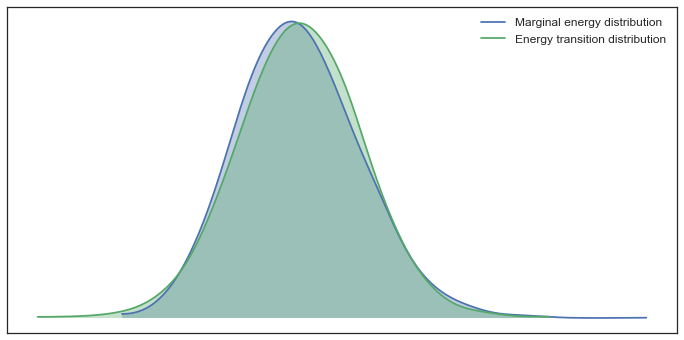

In [23]:
pm.energyplot(model2.trace);

### Criticize the model

In [24]:
pm.summary(model2.trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu__0_0,5.012208,0.063459,0.000506,4.885851,5.135442,14783.745310,0.999851
mu__0_1,3.397522,0.072278,0.000569,3.252539,3.533969,14301.507246,0.999933
mu__0_2,1.485131,0.030497,0.000254,1.426674,1.544899,16911.345807,0.999781
mu__0_3,0.255895,0.021337,0.000169,0.214929,0.297620,13970.212384,0.999961
mu__1_0,5.984250,0.101500,0.000834,5.788512,6.182700,13085.818483,0.999827
mu__1_1,2.738908,0.053064,0.000481,2.636860,2.846584,14679.479750,0.999948
mu__1_2,4.264700,0.095694,0.000827,4.066109,4.445209,16974.414575,0.999911
mu__1_3,1.332982,0.033943,0.000311,1.264938,1.398529,12851.649197,0.999866
mu__2_0,6.657839,0.111913,0.000745,6.444689,6.885482,16906.114757,0.999837
mu__2_1,2.960206,0.052699,0.000399,2.857604,3.063223,15651.929453,0.999775


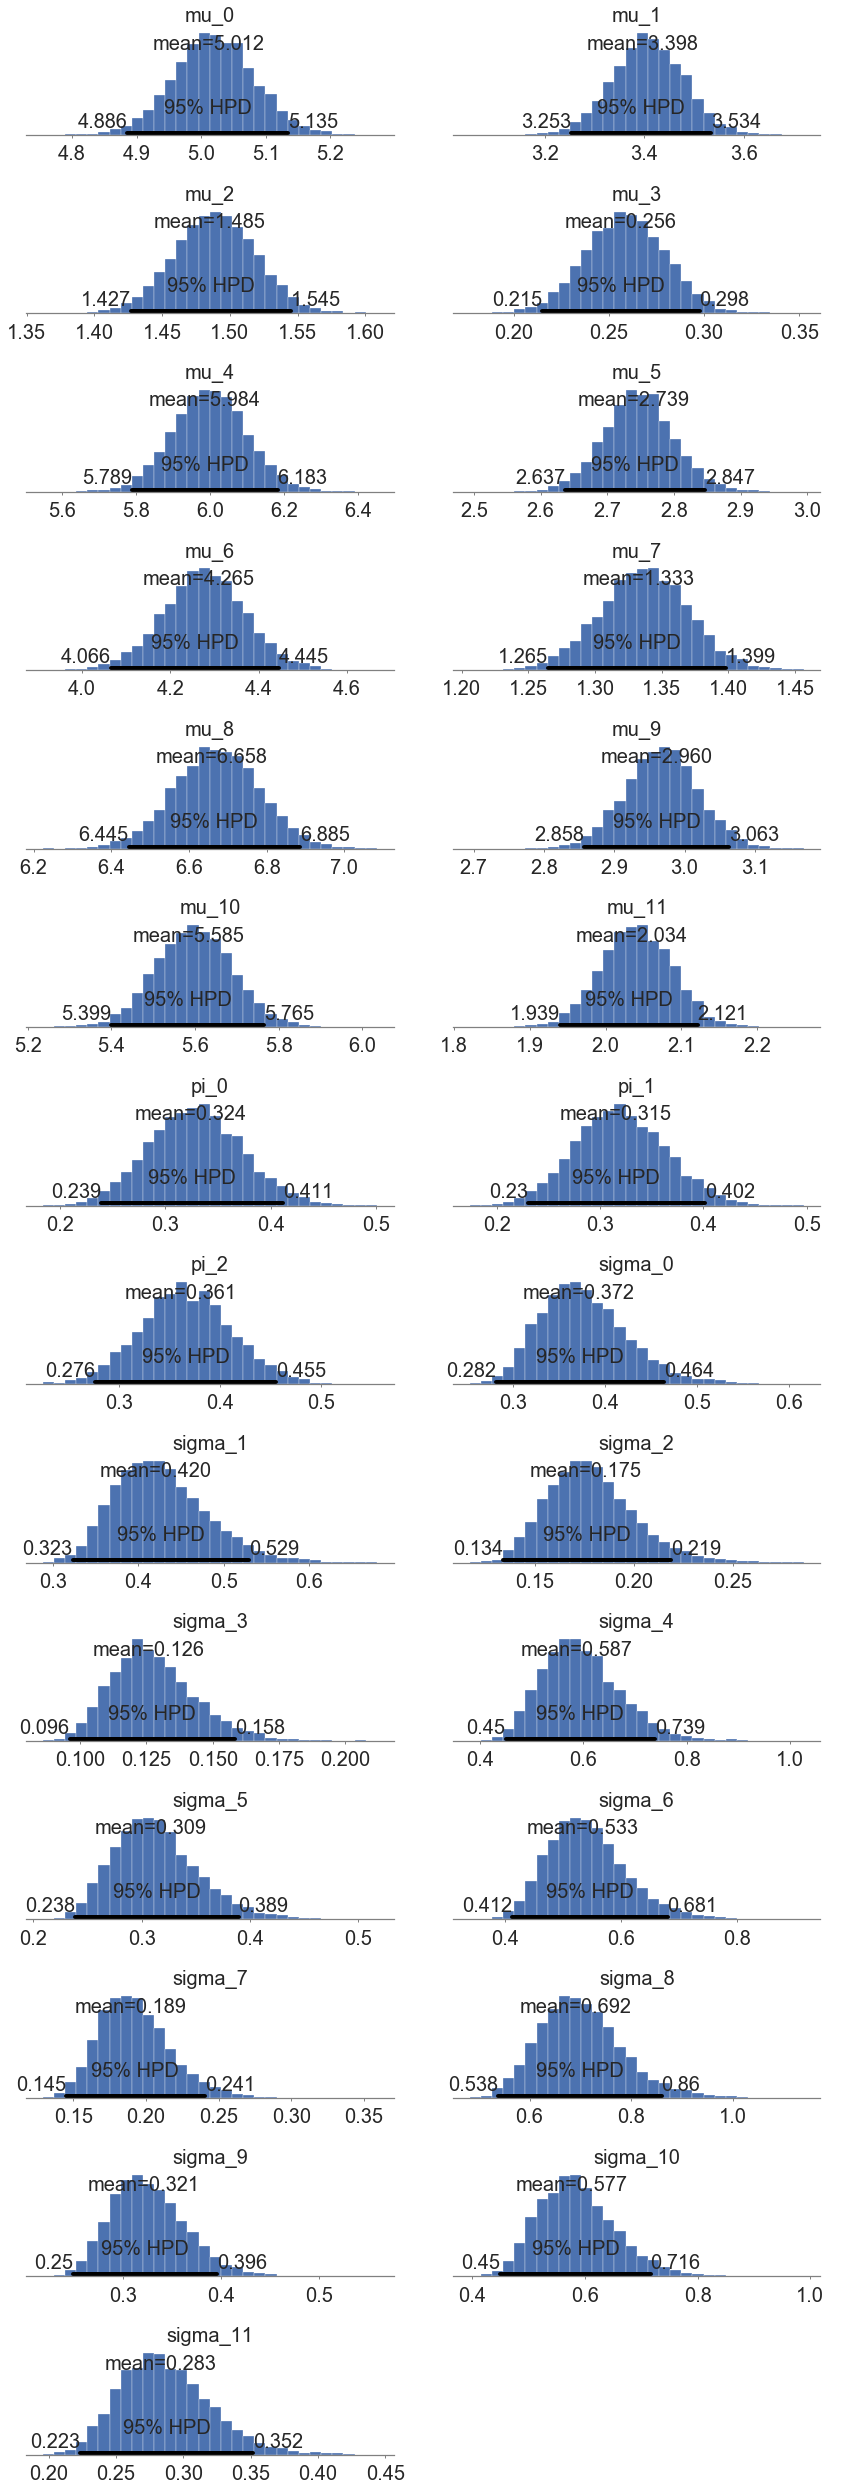

In [25]:
pm.plot_posterior(model2.trace);

### Use the model for prediction

In [26]:
y_predict2 = model2.predict(X_test)

In [27]:
model2.score(X_test, y_test)

0.9555555555555556

In [28]:
model2.save('pickle_jar/gaussian_nb2')
model2_new = GaussianNB()
model2_new.load('pickle_jar/gaussian_nb2')
model2_new.score(X_test, y_test)

0.9555555555555556